In [1]:
import pandas as pd

from pyextremes import __version__, get_extremes
from pyextremes.plotting import plot_extremes
print("pyextremes", __version__)

pyextremes 2.2.3


# Load Data

In [2]:
data = pd.read_csv(
    "../../../data/battery_wl.csv",
    index_col=0,
    parse_dates=True,
    squeeze=True,
)
data = (
    data
    .sort_index(ascending=True)
    .astype(float)
    .dropna()
)
data = data.loc[pd.to_datetime("1980"):pd.to_datetime("1995")]
data = data - (data.index.array - pd.to_datetime("1992")) / pd.to_timedelta("365.2425D") * 2.87e-3

# High Extremes
## 1-year Block

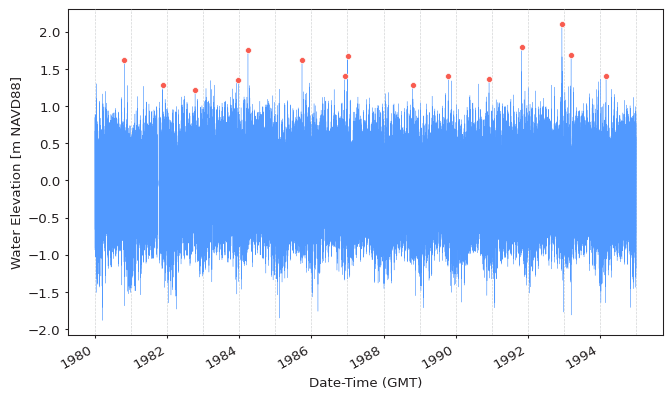

In [3]:
extremes = get_extremes(
    ts=data,
    method="BM",
    extremes_type="high",
    block_size="365.2425D",
    min_last_block=0.7,
)
fig, ax = plot_extremes(
    ts=data,
    extremes=extremes,
    extremes_method="BM",
    extremes_type="high",
    block_size="365.2425D",
    figsize=(8, 5),
)
fig.savefig("bm-high-1y.png", dpi=96, bbox_inches="tight")

## 2-year Block

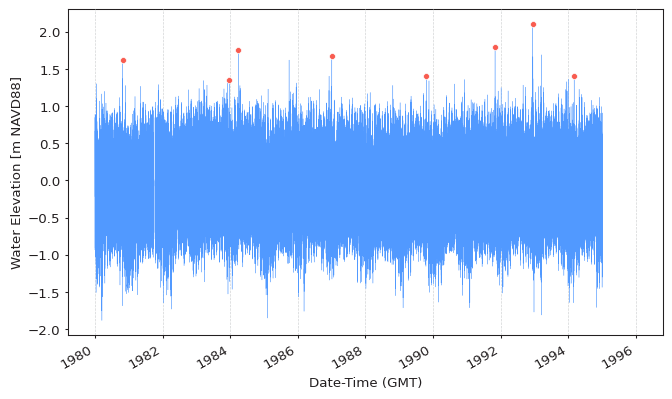

In [4]:
block_size = pd.to_timedelta("365.2425D") * 2
extremes = get_extremes(
    ts=data,
    method="BM",
    extremes_type="high",
    block_size=block_size,
    min_last_block=None,
)
fig, ax = plot_extremes(
    ts=data,
    extremes=extremes,
    extremes_method="BM",
    extremes_type="high",
    block_size=block_size,
    figsize=(8, 5),
)
fig.savefig("bm-high-2y.png", dpi=96, bbox_inches="tight")

# Low Extremes

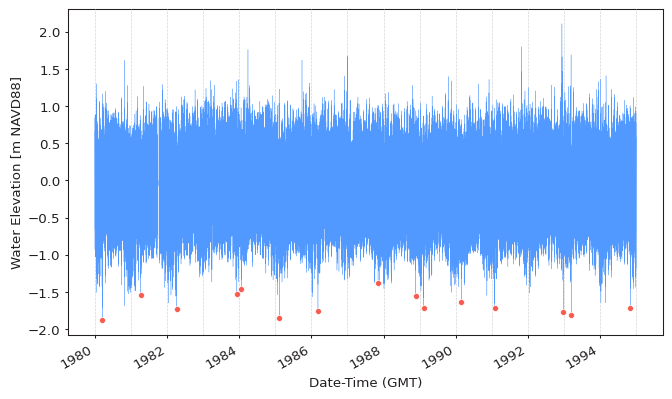

In [5]:
extremes = get_extremes(
    ts=data,
    method="BM",
    extremes_type="low",
    block_size="365.2425D",
    min_last_block=0.7,
)
fig, ax = plot_extremes(
    ts=data,
    extremes=extremes,
    extremes_method="BM",
    extremes_type="high",
    block_size="365.2425D",
    figsize=(8, 5),
)
fig.savefig("bm-low-1y.png", dpi=96, bbox_inches="tight")